# Latent Semantic Analysis (LSA)

The LSA is a dimension reduction technique that can be used to uncover common topics in a corpus of text documents.

First of all, we will do a short introduction to singular value decomposition (SVD) and then we will see how to apply LSA to a corpus of text documents.

## Eigenvalue Decomposition

We have already seen that pre-multiplying a vector by a square matrix (of the same dimension) is a linear transformation that maps the vector to another vector in the same space. Furthermore, we have seen that this operation does two things: it scales (stretches or shrinks) the vector and it rotates it. It turns out that there are some special vectors that only get scaled (not rotated) when we apply the linear transformation. This means that the whole matrix multiplication actually only acts as a scaler for these vectors.

 These vectors are called **eigenvectors** (owned by the matrix) of the matrix, and the scaling factors are called **eigenvalues**. Translating the properties (matrix multiplication as a scaler means no rotation) into a mathematical equation, we get the following definition:

$$
A \mathbf{v} = \lambda \mathbf{v}
$$

This expression basically restarts the previous paragraphs more succinctly: multiply the special vector by the whole matrix and the result is the same as multiplying the vector by a scalar (the eigenvalue).

To find the eigenvalues we can rearrange the equation a bit:

$$
A \mathbf{v} - \lambda \mathbf{v} = 0
$$

and we can factor out the vector:

$$
(A - \lambda) \mathbf{v} = 0
$$

But wait, this will be wrong... We cannot factor out the vector like that because we are subtracting a scalar from a matrix. To fix this, we can multiply the scalar by the identity matrix (which does not change anything):

$$
(A - \lambda I) \mathbf{v} = 0
$$

To see that the first approach was wrong, simply try a small example with numbers.

$$
\begin{align*}
\begin{bmatrix} 1 & 2 \\ 3 & 1 \end{bmatrix} \begin{bmatrix} 1 \\ 2 \end{bmatrix}  = -0.37 \begin{bmatrix} -0.82 \\ -0.41 \end{bmatrix} \\
\end{align*}
$$



In [21]:
import numpy as np
A = np.array([[1, 2], [3, 4]])
print(A)

evd = np.linalg.eig(A)
print(evd)

e1 = np.array([-0.82456484, 0.56576746])
e2 = np.array([-0.41597356, -0.90937671])

[[1 2]
 [3 4]]
EigResult(eigenvalues=array([-0.37228132,  5.37228132]), eigenvectors=array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]]))




## Singular Value Decomposition (SVD)

First, a short review of eigenvalues and eigenvectors. Let us see what matrix multiplication actually does. 

Consider a simple $2 \times 2$ matrix $A$ and a 2-dimensional vector $v$:

$$
A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}, \quad v = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

When we multiply the matrix $A$ by the vector $v$, we get a new vector $w$:

$$
w = Av = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 3 \\ 7 \end{bmatrix}
$$

Let us plot the vectors $v$ and $w$:


The vector w is: [3 7]


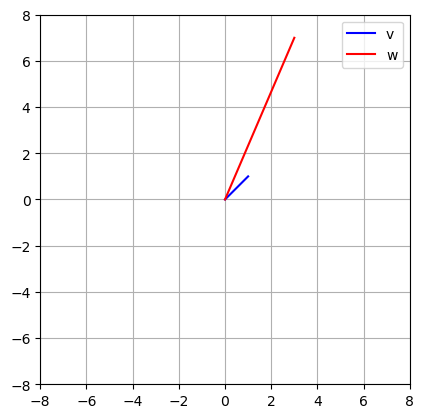

In [4]:
#| label: fig-vector-matrix-product
#| fig-cap: "Original vector v (blue) and the result of the matrix-vector product Av (red)."

import numpy as np
import matplotlib.pyplot as plt

v = np.array([1, 1])
A = np.array([[1, 2], [3, 4]])

w = A @ v
print("The vector w is:", w)

# Plot v and w

plt.plot([0, v[0]], [0, v[1]], 'b', label='v')
plt.plot([0, w[0]], [0, w[1]], 'r', label='w')
plt.axis('square')
plt.axis([-8, 8, -8, 8])
plt.grid()
plt.legend()
plt.show()

From @fig-vector-matrix-product we see that the matrix $A$ has both rotated and scaled the vector $v$ to get the vector $w$. 

For square matrices, there are special vectors. When we multiply these special vectors by the matrix, it acts as a simple scalar multiplication instead of rotating them. These special vectors are called eigenvectors. Because the matrix only scales these vectors, the scaling factor is called the eigenvalue.

$$
A v = \lambda v
$$

where $\lambda$ is the eigenvalue and $v$ is the eigenvector. How to find these special vectors? We can find them by solving the following equation:

$$
(A - \lambda I) v = 0
$$

where $I$ is the identity matrix. There is a result from linear algebra that says that a matrix multiplied by a vector is zero only if the vector is zero or the matrix is singular. If the matrix $A - \lambda I$ is singular, then its determinant is zero. This gives us the eigenvalues.

$$
\text{det}(A - \lambda I) = 0
$$

An interesting result is that if the matrix $A$ is symmetric, then its eigenvectors are orthogonal. To see this, suppose that $v_1$ and $v_2$ are eigenvectors of a symmetric matrix $A$ with eigenvalues $\lambda_1 \neq \lambda_2$.

Because $v_1$ and $v_2$ are eigenvectors, we have:

$$
A v_1 = \lambda_1 v_1, \quad A v_2 = \lambda_2 v_2
$$

If the eigenvectors are orthogonal, then their dot product is zero:

$$
v_1^T v_2 = 0
$$

Because the matrix $A$ is symmetric, we have:

$$
A^T = A
$$

Let's take the dot product as a starting point and try to prove that the eigenvectors are orthogonal. We have:

$$
\lambda_1 v_1^T v_2 = (A v_1)^T v_2 = v_1^T A^T v_2 = v_1^T A v_2 = (A v_1)^T v_2 = \lambda_2 v_1^T v_2
$$

In the end, we get:

$$
(\lambda_1 - \lambda_2) v_1^T v_2 = 0
$$

For this equation to hold, one of the terms must be zero. The first term is the difference of the eigenvalues, which is not zero as we assumed that $\lambda_1 \neq \lambda_2$. Therefore, the second term must be zero:

$$
v_1^T v_2 = 0
$$

This means that the eigenvectors of a symmetric matrix are orthogonal.


In [8]:
# A quick illustration

A = np.array([[1, 2], [2, 1]])
A

array([[1, 2],
       [2, 1]])

In [9]:
# Eigenvalues and eigenvectors

eigenvalues, eigenvectors = np.linalg.eig(A)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

Eigenvalues: [ 3. -1.]
Eigenvectors: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [11]:
# If the eigenvectors are orthogonal, their dot product is zero

eigenvectors[:, 0].dot(eigenvectors[:, 1])


0.0

In [14]:
# The eigenvectors and eigenvalues of a symmetric matrix are unique up to scaling
# The np.linalg.eig function returns the eigenvectors normalized to have unit length

eigenvectors[:, 0].dot(eigenvectors[:, 0])

0.9999999999999999

## Eigendeomposition

We have just seen that the eigenvectors of a symmetric matrix are orthogonal. Their length is not fixed, but we can normalize them to have a length of 1 (as does `np.linalg.eig`). So we have a set of vectors pointing in different directions and with a length of 1. An amazing result is that we can decompose any matrix into a product of these eigenvectors and eigenvalues. This is called the eigendecomposition:

$$
A = V \Lambda V^T
$$

where $V$ is a matrix with the eigenvectors as columns and $\Lambda$ is a diagonal matrix with the eigenvalues on the diagonal. The matrix $V$ is orthogonal, so its inverse is its transpose.

In [17]:
# If the eigenvectors are orthogonal to each other and normalized to have unit length,
# then the matrix product of the eigenvectors matrix is the identity matrix

eigenvectors @ eigenvectors.T


array([[1., 0.],
       [0., 1.]])

In [32]:
# We can reconstruct the original matrix from its eigenvectors and eigenvalues

A_reconstructed = eigenvectors @ np.diag(eigenvalues) @ eigenvectors.T
print("Original matrix:")
print(A)
print("Reconstructed matrix:")
print(A_reconstructed)


Original matrix:
[[1 2]
 [2 1]]
Reconstructed matrix:
[[1. 2.]
 [2. 1.]]


In [31]:
# You can think of the reconstructions as adding layers of information to the matrix

eigenvectors[:, 0].reshape(-1, 1)


array([[0.70710678],
       [0.70710678]])

In [1]:
import pandas as pd
import numpy as np
import re
import nltk

nltk.download('reuters')

from nltk.corpus import reuters
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

[nltk_data] Downloading package reuters to /home/amarov/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [2]:
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

In [3]:
housing_fileids = reuters.fileids(["housing"])
income_fileids = reuters.fileids(["income"])
heating_fileids = reuters.fileids(["heat"])

housing_text = reuters.raw(fileids=housing_fileids).split("\n\n")
income_text = reuters.raw(fileids=income_fileids).split("\n\n")
heating_text = reuters.raw(fileids=heating_fileids).split("\n\n")

texts = housing_text + income_text + heating_text
topics = ["housing"] * len(housing_text) + ["income"] * len(income_text) + ["heating"] * len(heating_text)

len(texts)

67

In [4]:
texts[1]

'INTEREST RATES HURT U.S. MAY HOUSING SALES\n  Sales of new single-family homes\n  tumbled 14.9 pct in May from April levels because of higher\n  mortgage interest rates, analysts said.\n      "There should be another month or two of very weak new home\n  sales but with interest rates stabilizing, sale of new homes\n  should become more stable by mid-summer," said economist\n  Lawrence Chimerine of Wharton Econometrics Inc.\n      The drop in May, to a seasonally adjusted annual rate of\n  616,000 units, was the largest since January 1982, the Commerce\n  Department said.\n      Interest rates on conventional mortgages bottomed out at\n  about 9.08 pct in March and rose to about 10.7 pct in April,\n  according to Stephen Roach, economist at Morgan Stanley.\n      The effect was to freeze some potential new homebuyers out\n  of the market, he and others said.\n      "The rates moved very suddenly and were certainly\n  unexpected by homebuyers," said Cynthia Latta, an economist\n  with D

In [5]:
# We will remove the numbers from the text, because here these are very common in every article and obfuscate
# the results

texts = [re.sub("\d+", "", text) for text in texts]

from sklearn.feature_extraction.text import CountVectorizer

tfidf = TfidfVectorizer(
    lowercase=True,
    stop_words="english",
    min_df=0.05
)
term_doc_matrix = tfidf.fit_transform(texts)

term_doc_df = pd.DataFrame(
    term_doc_matrix.toarray(),
    columns=tfidf.get_feature_names_out()
)

## Should probably remove numbers
term_doc_df.head()

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_8937/761169982.py:4: SyntaxWarning: invalid escape sequence '\d'
  texts = [re.sub("\d+", "", text) for text in texts]


,according,added,adjusted,ago,analysts,annual,april,area,average,bank,...,unchanged,underlying,unit,united,units,wage,week,year,years,york
0,0.056346,0.051617,0.000000,0.0,0.000000,0.041284,0.041284,0.0,0.080446,0.215250,...,0.000000,0.00000,0.000000,0.059343,0.040223,0.0,0.0,0.365551,0.059343,0.000000
1,0.058931,0.000000,0.037393,0.0,0.058931,0.043178,0.086356,0.0,0.000000,0.056281,...,0.000000,0.05196,0.000000,0.000000,0.042068,0.0,0.0,0.000000,0.000000,0.044364
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.219761,0.0,0.000000,0.042293,0.000000,0.0,0.000000,0.000000,...,0.044703,0.00000,0.043455,0.000000,0.453269,0.0,0.0,0.000000,0.000000,0.000000


In [6]:
term_doc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Columns: 202 entries, according to york
dtypes: float64(202)
memory usage: 105.9 KB


$$
A_{m\times n} = \mathbf{U}_{m \times m} \mathbf{\Sigma}_{m \times n} \mathbf{V}^T_{n \times n}
$$
Where $\mathbb{U}$ and $\mathbb{V}$ are orthogonal matrices.

$$
\mathbf{A} = \begin{pmatrix}
u_{11} & u_{12} & \cdots & u_{1m} \\
u_{21} & u_{22} & \cdots & u_{2m} \\
\vdots \\
u_{m1} & u_{m2} & \cdots & u_{mm} \\
\end{pmatrix}
\begin{pmatrix}
\sigma_1 & 0 & \cdots & 0 & 0\\
0 & \sigma_2 & \cdots & 0 & 0\\
0 & 0 & \ddots & \sigma_k & \vdots \\
0 & 0 & \cdots & 0 & \mathbf{0}_{n - k \times m - k}
\end{pmatrix}

\begin{pmatrix}
v_{11} & v_{12} & \cdots & v_{1n} \\
v_{21} & v_{22} & \cdots & v_{2n} \\
\vdots \\
v_{n1} & v_{m2} & \cdots & v_{nn} \\
\end{pmatrix}^T
$$

$$
\begin{align}
\mathbf{A} & = \begin{pmatrix}
u_{11} \\
u_{21} \\
\vdots\\
u_{m1}
\end{pmatrix}
\times \sigma_1 \times 
\begin{pmatrix}
v_{11} & v_{12} & \ldots & v_{1n}
\end{pmatrix} +  \\

& \begin{pmatrix}
u_{12} \\
u_{22} \\
\vdots\\
u_{m2}
\end{pmatrix}
\times \sigma_2 \times 
\begin{pmatrix}
v_{21} & v_{22} & \ldots & v_{2n}
\end{pmatrix} + \\
& \vdots \\
\end{align}
$$

You can think about matrix multiplication as a sum of outer products

$$
\begin{pmatrix}
0 & 1 \\
2 & 3
\end{pmatrix}
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix}
= \begin{pmatrix}
0a & 0b \\
2a & 2b
\end{pmatrix}
+ 
\begin{pmatrix}
1c & 1d \\
3c & 3d
\end{pmatrix} = 
\begin{pmatrix}
0a + 1c & 0b + 1d \\
2a + 3c & 2b + 3d
\end{pmatrix}
$$

Using this you can write the singular value decomposition as a sum of outer products.

$$
\mathbf{A} = \sum_{i} \sigma_i \mathbf{u}_i\mathbf{v}_i^T
$$

While the outer products represent directions, you can think about the singular values as describing the _importance_ of these directions.

Some of the terms in the sum contribute less to A, so dropping these from the sum results in a lower-rank (p) approximation of the matrix.

$$
\mathbf{A} \approx \sum_{i = 1}^{p} \sigma_i \mathbf{u}_i\mathbf{v}_i^T
$$




Example document-term matrix:

| Documents/Terms | house | oil  | wage |
|-----------------|-------|------|------|
| Doc1 (housing)  | 1.43  | 0.02 | 0.3  |
| Doc2 (income)   | 0.4   | 0.01 | 1.2  |
| Doc3 (heat)     | 0.35  | 1.7  | 0.04 |

Example terms-topic matrix: values indicate how strongly a word is related to a topic.

| Word/Topic | housing | income | heat |
|------------|---------|--------|------|
| house      | 1.43    | 0.022  | 0.34 |
| wage       | 0.14    | 2.01   | 0.25 |
| oil        | 0.35    | 0.21   | 1.12 |

Example document-topic matrix: the values in this matrix indicate how strongly
a document is related to a topic.

| Document/Topic | housing | income | heat |
|----------------|---------|--------|------|
| Doc1 (housing) | 1.43    | 0.01   | 0.21 |
| Doc2 (income)  | 0.14    | 2      | 0.25 |
| Doc3 (heat)    | 0.38    | 0.21   | 1.17 |


The singular values indicate how strongly a topic contributes to explaining
the data (term-document frequencies).

| Topic   | singular value |
|---------|----------------|
| housing | 6.2            |
| wage    | 2.3            |
| oil     | 0.02           |


In [7]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(n_components=30, n_iter=100, random_state=42)
lsa_result = lsa.fit_transform(term_doc_df)
Sigma = lsa.singular_values_
V_T = lsa.components_.T
V_T

array([[ 0.01101562,  0.02439823, -0.00161363, ..., -0.02487008,
        -0.01906654, -0.01775292],
       [ 0.01683061,  0.00145462, -0.016919  , ..., -0.01384861,
        -0.01824396,  0.02444552],
       [ 0.10548801, -0.02915534,  0.11419569, ..., -0.04158702,
        -0.1313619 ,  0.00392041],
       ...,
       [ 0.15972607, -0.02640216, -0.08136184, ...,  0.0724007 ,
         0.17677594,  0.05606418],
       [ 0.01335311,  0.0091913 , -0.00876963, ...,  0.01770479,
        -0.03152487,  0.02959704],
       [ 0.02667957,  0.14944649,  0.00880958, ..., -0.07018896,
        -0.04003199,  0.00985056]])

<Axes: >

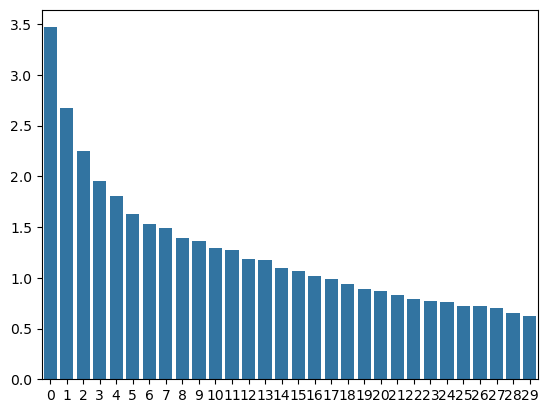

In [8]:
sns.barplot(x=list(range(len(Sigma))), y = Sigma)

In [9]:
term_topic_matrix = pd.DataFrame(data=V_T,
                                 index=term_doc_df.columns,
                                 columns = [f'Component {r}' for r in range(0,V_T.shape[1])])
term_topic_matrix

,Component 0,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,...,Component 20,Component 21,Component 22,Component 23,Component 24,Component 25,Component 26,Component 27,Component 28,Component 29
according,0.011016,0.024398,-0.001614,0.008535,-0.009180,0.028410,-0.009367,-0.028593,0.054321,-0.014011,...,0.123077,-0.059647,0.081321,0.108827,0.103682,-0.026132,0.086406,-0.024870,-0.019067,-0.017753
added,0.016831,0.001455,-0.016919,0.007546,-0.023014,0.021992,-0.031480,-0.037103,0.012437,0.009522,...,0.023162,0.057442,0.014347,0.003134,-0.028848,-0.017090,0.015291,-0.013849,-0.018244,0.024446
adjusted,0.105488,-0.029155,0.114196,-0.037458,-0.085096,-0.045588,-0.041630,0.044755,-0.014731,0.025389,...,-0.058722,0.041000,0.035087,0.080478,0.063575,0.015637,-0.001009,-0.041587,-0.131362,0.003920
ago,0.020690,0.001509,-0.013194,-0.003925,-0.023187,0.004307,0.003622,-0.001829,-0.006370,0.032890,...,0.013501,-0.022060,-0.052997,-0.007442,-0.023022,-0.016295,0.082894,0.009509,-0.009192,0.004566
analysts,0.019367,0.014118,-0.002075,0.000837,-0.027660,0.063290,-0.004396,-0.054687,0.091456,0.008507,...,0.201333,0.142167,0.037377,-0.102600,0.129020,0.025406,0.007310,-0.046779,0.032218,-0.038021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wage,0.036213,-0.006499,-0.067636,-0.088962,-0.006264,-0.016005,0.026172,-0.031241,0.005113,-0.148983,...,-0.029038,0.127954,0.038232,0.062789,-0.034565,0.022911,-0.008388,-0.062696,0.027726,-0.008366
week,0.025413,0.038685,-0.000160,0.006536,-0.026049,0.071830,0.000728,-0.054469,0.106938,0.012066,...,0.179050,0.076547,-0.021056,-0.100622,0.181238,-0.013838,0.003907,0.020974,0.020679,0.010763
year,0.159726,-0.026402,-0.081362,-0.043734,-0.063589,0.136046,-0.332106,-0.184065,-0.107725,0.026610,...,0.034884,-0.083444,0.118945,-0.062420,0.042034,0.088592,-0.084694,0.072401,0.176776,0.056064
years,0.013353,0.009191,-0.008770,0.021923,-0.000794,0.020382,-0.033321,-0.003943,-0.024872,-0.014972,...,-0.010101,0.054964,-0.093024,-0.053463,0.011144,0.012792,0.187997,0.017705,-0.031525,0.029597


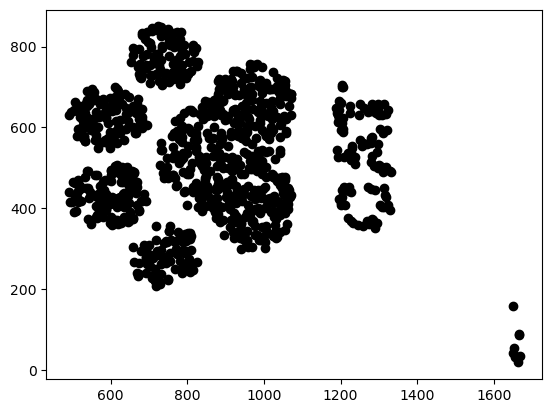

In [22]:
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Load the WebP image as black and white

image_path = '../figures/istockphoto-1194128644-2048x2048.webp'
image = Image.open(image_path).convert('1')

# Select the left half of the image

left_half = image.crop((0, 0, image.width // 2, image.height))

image_left = np.array(left_half)
df = pd.DataFrame(image_left)

df_l = df.stack().reset_index()
df_black = df_l[df_l[0] == False].sample(1000)
df_black.columns = ['x', 'y', 'black']
df_black["z"] = np.random.randn(len(df_black))

plt.plot(df_black['x'], df_black['y'], 'o', color='black')


In [23]:
# Plotly create a 3D scatter plot
fig = px.scatter_3d(df_black, x='x', y='y', z='z', size_max=3)
fig.update_traces(marker=dict(size=3))  # Reduce the size of the points
fig.show()

In [37]:
lsa = TruncatedSVD(n_components=3)
lsa_result = lsa.fit_transform(df_black[['x', 'y', 'z']])
Sigma = lsa.singular_values_
V_T = lsa.components_.T

<Axes: >

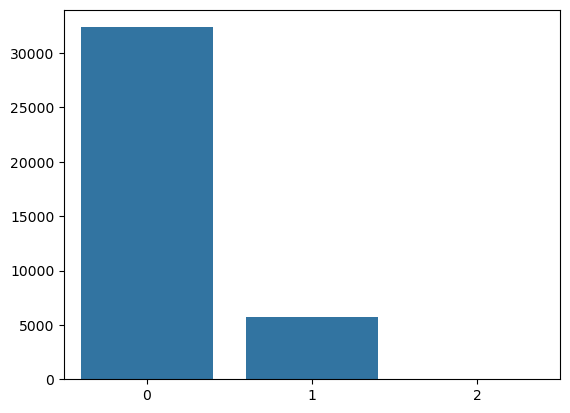

In [38]:
sns.barplot(x=list(range(len(Sigma))), y = Sigma)

In [39]:
lsa_result.shape

(1000, 3)

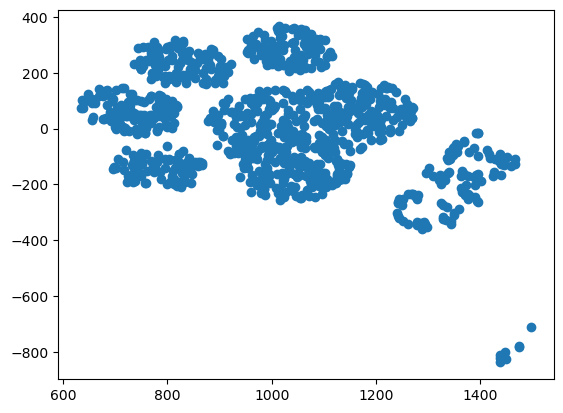

In [40]:
# Plot the first two components of the last SVD

plt.scatter(lsa_result[:, 0], lsa_result[:, 1])